In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib
import splinelib as tsp

(400, 2) (400, 1)


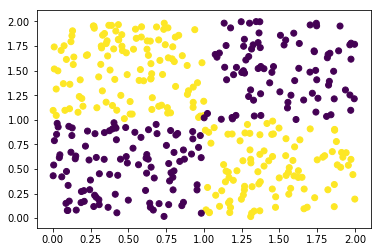

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
colors = ['r', 'y', 'g', 'b']

### To fit the data we need 2 projection--->prediction

In [4]:
max_points = 4
lr=0.1

x_=x.copy()
x1, x2 = x_[:, 0], x_[:, 1]

spline1 = tsp.Spline1D(max_points, x1, y)
spline2 = tsp.Spline1D(max_points, x2, y)
sigmoid = tnn.Sigmoid()

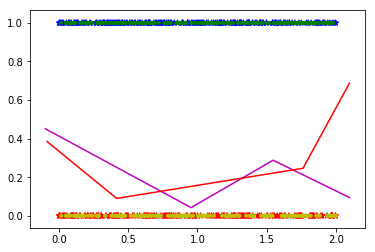

In [5]:
%matplotlib inline
plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

_______________________
Steps 0
Error 0.2560212739909222


_______________________
Steps 100
Error 0.24848104938761403


_______________________
Steps 200
Error 0.24766194522484747


_______________________
Steps 300
Error 0.2473058479108856


_______________________
Steps 400
Error 0.2471313094774426


_______________________
Steps 500
Error 0.2470462856740051


_______________________
Steps 600
Error 0.24700714414775157


_______________________
Steps 700
Error 0.24698801780995172


_______________________
Steps 800
Error 0.2469754178044891


_______________________
Steps 900
Error 0.2469654163182615


_______________________
Steps 1000
Error 0.24695557753112163


_______________________
Steps 1100
Error 0.2469433646835284


_______________________
Steps 1200
Error 0.2469213315196215


_______________________
Steps 1300
Error 0.24688215181824366


_______________________
Steps 1400
Error 0.24683588350535401


_______________________
Steps 1500
Error 0.24679148017666785


____________

TclError: invalid command name "pyimage11"

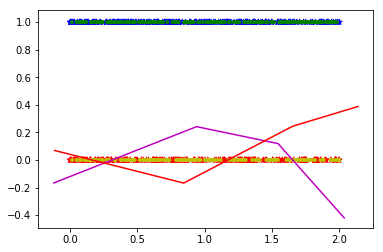

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
y_ = y.reshape(-1)

for step in range(100000):
    x1, x2 = x_[:, 0], x_[:, 1]
    
    Y1 = spline1.forward(x1)
    Y2 = spline2.forward(x2)
    Y = sigmoid.forward(Y1+Y2)
    dy = Y-y_
    dy1, dy2 = dy, dy
    
    dx_1 = spline1.backward(dy1)
    dx_2 = spline2.backward(dy2)
    
    dx = np.c_[dx_1, dx_2]

    spline1.update(lr)
    spline2.update(lr)
    
    if step % 1000 == 0:
        splines = [spline1, spline2]
        for spline in splines:
            spline._remove_close_points_()
            spline._add_new_point_()
            spline._remove_no_input_points_()
            spline._combine_linear_points_()
            
    if step % 100 == 0:
            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        out = (Y>0.5).astype(int)
        
        plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
        plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
        plt.plot(spline1.X, spline1.Y, color='m')
        plt.plot(spline2.X, spline2.Y, color='r')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

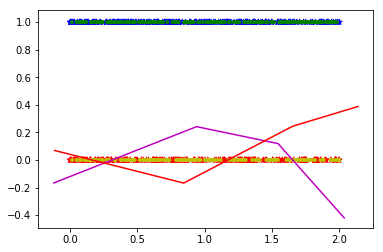

In [7]:
%matplotlib inline
x1, x2 = x_[:, 0], x_[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
# Y = Y1+Y2
Y = sigmoid.forward(Y1+Y2)
out = (Y>0.5).astype(int)

plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

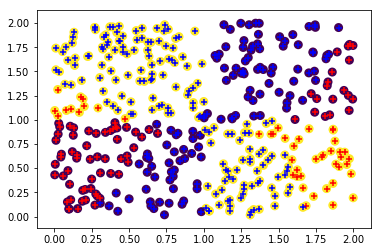

In [8]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

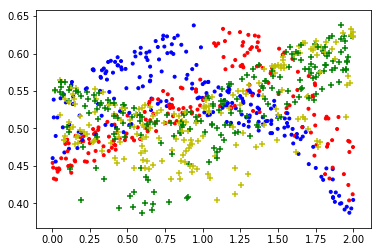

In [9]:
plt.scatter(x[:,0], Y, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], Y, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

In [10]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

x_ = xxyy
x1_, x2_ = x_[:, 0], x_[:, 1]
Y1_ = spline1.forward(x1_)
Y2_ = spline2.forward(x2_)
Y_ = sigmoid.forward(Y1_+Y2_)
out_ = (Y_>0.5).astype(int)

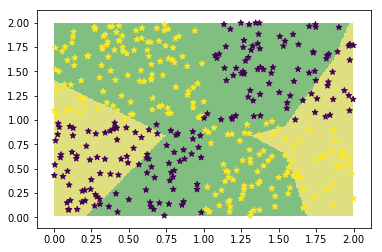

In [11]:
plt.imshow(out_.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

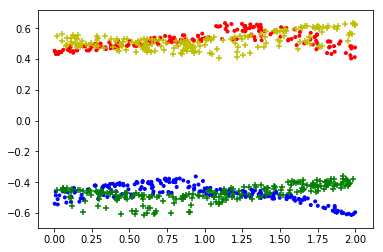

In [12]:
plt.scatter(x[:,0], dy, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], dy, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

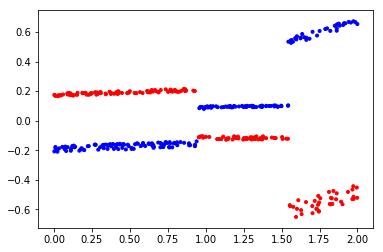

In [13]:
plt.scatter(x[:,0], dx_1, marker='.',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))

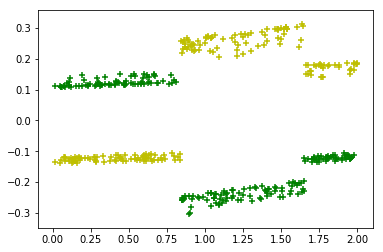

In [14]:
plt.scatter(x[:,1], dx_2, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

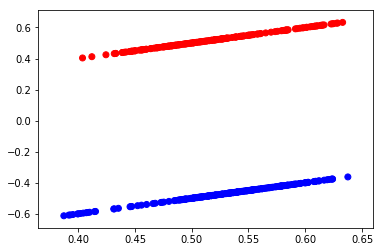

In [15]:
# Y_ = Y1+Y2
Y_ = Y
plt.scatter(Y_, dy, c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))

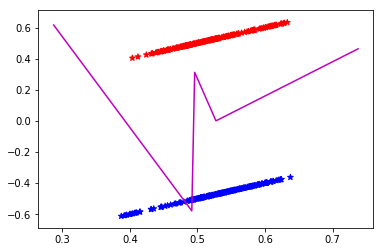

In [16]:
max_points = 5
lr=0.1
spliney_dy = tsp.Spline1D(max_points, Y_, dy)

%matplotlib inline
plt.scatter(Y_, dy, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(spliney_dy.X, spliney_dy.Y, color='m')

_______________________
Steps 0
Error 0.34536234785610387


_______________________
Steps 10
Error 0.25601433182149336


_______________________
Steps 20
Error 0.25074108405441875


_______________________
Steps 30
Error 0.24901019821846782


_______________________
Steps 40
Error 0.24835165375407015


_______________________
Steps 50
Error 0.247992233110475


_______________________
Steps 60
Error 0.24777590914730951


_______________________
Steps 70
Error 0.24761617535273436


_______________________
Steps 80
Error 0.24748594266139678


_______________________
Steps 90
Error 0.24737762537408972


_______________________
Steps 100
Error 0.2472841603374993


_______________________
Steps 110
Error 0.24719861715768868


_______________________
Steps 120
Error 0.24712059806927741


_______________________
Steps 130
Error 0.24705418952962663


_______________________
Steps 140
Error 0.246994918825397


_______________________
Steps 150
Error 0.2469400569442071


_______________________
S

_______________________
Steps 1330
Error 0.22501825404503514


_______________________
Steps 1340
Error 0.22508631161922524


_______________________
Steps 1350
Error 0.2250233705845816


_______________________
Steps 1360
Error 0.22493738061513063


_______________________
Steps 1370
Error 0.2248694440749783


_______________________
Steps 1380
Error 0.22487880037024874


_______________________
Steps 1390
Error 0.22492768572743146


TclError: invalid command name "pyimage30"

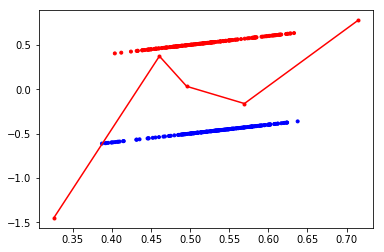

In [17]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):

    Y1 = spliney_dy.forward(Y_)
    dy1 = Y1-dy
    dy0 = spliney_dy.backward(dy1)
    spliney_dy.update(lr)
    
    if step % 100 == 0:
        spliney_dy._remove_close_points_()
        spliney_dy._combine_linear_points_()
        spliney_dy._remove_no_input_points_()
        spliney_dy._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy1**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(Y_, dy, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
        plt.plot(spliney_dy.X, spliney_dy.Y, marker='.', color='r')
#         plt.scatter(Y, dy1, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

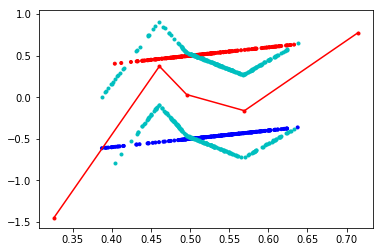

In [18]:
%matplotlib inline
plt.scatter(Y_, dy, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(spliney_dy.X, spliney_dy.Y, marker='.', color='r')
plt.scatter(Y, dy1, marker='.', color='c')

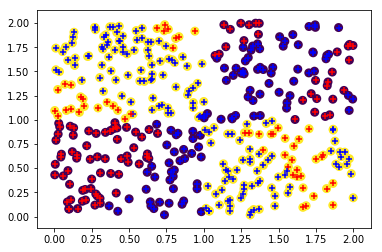

In [19]:
x1, x2 = x[:, 0], x[:, 1]
Y1 = spline1.forward(x1)
Y2 = spline2.forward(x2)
# Y = Y1+Y2
Y = sigmoid.forward(Y1+Y2)
dY0 = spliney_dy.forward(Y)
Y = Y - dY0
out = (Y>0.5).astype(int)

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=3)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

In [20]:
dy1 = Y-y_

error = (dy1**2).mean()
error

0.22486456754961728

In [21]:
x_ = xxyy
x1_, x2_ = x_[:, 0], x_[:, 1]
y1_ = spline1.forward(x1_)
y2_ = spline2.forward(x2_)
Y_ = sigmoid.forward(y1_+y2_)
y1_ = spliney_dy.forward(Y_)
Y1_ = Y_ - y1_

out_ = (Y1_>0.5).astype(int)

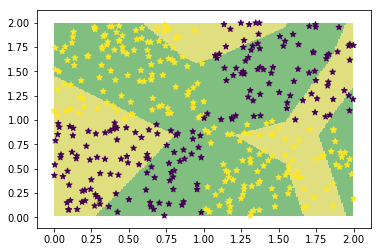

In [22]:
plt.imshow(out_.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')